In [13]:
#importando bibliotecas

import math
import yfinance
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as mplt



In [14]:
#definindo os ativos para realizar os cálculos

tickers = ['VALE3.SA', 'PETR4.SA']

In [15]:
# Download dos dados pelo yahoo finance

data = yfinance.download(
    tickers = tickers,
    start="2020-05-01",
    end="2020-08-05",
    interval = '1d',
    treads = False
)

[*********************100%***********************]  2 of 2 completed


In [16]:
series_x = data['Close'][tickers[0]]
series_y = data['Close'][tickers[1]]


In [17]:
# Regressão e Resíduo
X = sm.add_constant(series_x.values)
mod = sm.OLS(series_y, X) 
results = mod.fit()

In [18]:
# Realizando teste de cointegração
adfTest = adfuller(results.resid, autolag = 'AIC')
print(adfTest)

(-2.5813107531836876, 0.09692180279159707, 0, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 65.0062711551723)


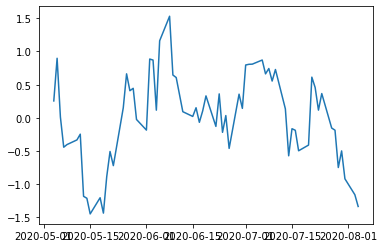

In [19]:
# Plotando os resíduos

mplt.plot(results.resid)
mplt.show()

In [20]:
# Calculando a meia vida

lagged = results.resid.shift(1).fillna(method="bfill")
delta = results.resid-lagged
X = sm.add_constant(lagged.values)
ar_res = sm.OLS(delta, X).fit()
half_life = -1*np.log(2)/ar_res.params['x1']
    

In [21]:
# mostrando a meia vida normal e arredondada
half_life_round = math.ceil(half_life)

print('meia vida: ', half_life)
print('meia vida arredondada: ', half_life_round)

meia vida:  3.1825588608948134
meia vida arredondada:  4


In [22]:
#regressão de mínimos quadrados

def get_scatter_plot(series_x, series_y, ols, xlabel = ' ', ylabel = ' '):
    x = np.arange(series_x.min(), series_x.max())
    mplt.clf
    mplt.cla
    mplt.scatter(series_x, series_y)
    mplt.plot(x, ols.params.const + ols.params[0] * x, color = 'red')
    mplt.xlabel(xlabel)
    mplt.ylabel(ylabel)
    mplt.show()
    

Beta:  -0.21779555724071004


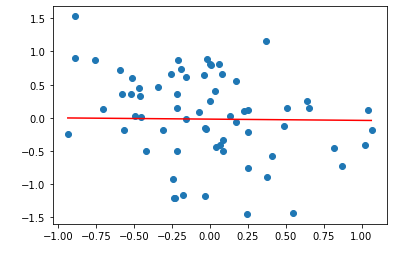

In [23]:
# plotando a regressão

print('Beta: ', ar_res.params['x1'])
get_scatter_plot(delta, lagged, ar_res)